#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Md. Abu Shahan<br>
<b>Reg. No:</b> 170103020017

### Assignment 4: Radial Basis Function Network

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import numpy as np

<b>Dataset</b> <br>
Here,<br>
Training data shape is (NxD) 

In [2]:
np.random.seed(50)
X, y = make_moons(n_samples=500, noise=0.1)

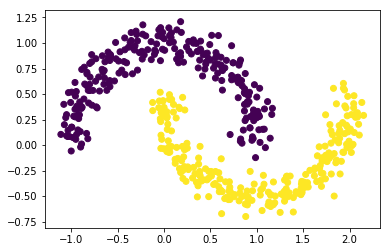

In [3]:
plt.scatter(X[:,0], X[:,1] ,c=y )

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
print('Train shape: ', X_train.shape, y_train.shape)
print('Test shape: ',X_test.shape, y_test.shape)

Train shape:  (400, 2) (400,)
Test shape:  (100, 2) (100,)


<b>Task 1: Calculate Hidden Neuron Centroids</b>

K=12 <br>
Calculate Centroids using K-Means. <br>
Centroids shape should be (KxD) <br>
Print and plot the centroids with the data.

In [5]:
#your code goes here.
def centroids(k):
    c=[]
    while True:
        idx=np.random.choice(range(len(X)), k)
        l = len(set(idx))
        if l == k:
            for i in range(k):
                c.append(list(X[idx[i]]))
            break

    return c

In [11]:
def distance(c,x):  
    g={}
    for i in range(0,len(x)):
        t=[]
        for j in range(0,len(c)):
            t.append(np.sqrt((x[i][0]-c[j][0])**2+(x[i][1]-c[j][1])**2))

        mn=min(t)
        #print(len(t))
        for k in range(0,len(t)):
            if(t[k]==mn):
                g1=[]
                #print(len(t))
                if k in g.keys():
                    g1=g[k].copy()
                g1.append(list(X[i]))
                g[k]=g1
                break
            
    return g

In [12]:
def solution(k):
    c=centroids(k)
    new_c=c
    while(1):
        c=new_c
        g=distance(c,X)
        new_c=[]
        dic={}
        for k,v in g.items():
            avg_x=0
            avg_y=0
            for i in range(0,len(g[k])):
                avg_x+=v[i][0]
            for i in range(0,len(g[k])):
                avg_y+=v[i][1]    
            avg_x/=(len(g[k])*1.0)
            avg_y/=(len(g[k])*1.0)
            dic[k]=list([avg_x,avg_y])
        for i in range(0,len(dic)):
            new_c.append(dic[i])

        if(c==new_c):
            break;

    new_c=np.array(new_c)
    #new_g=np.array(g)
    return new_c

In [13]:
k=12
new_c1=solution(k)
print(new_c1)

[[ 1.9682629   0.24225359]
 [ 1.74850756 -0.19049127]
 [-0.94301538  0.2592151 ]
 [ 0.57516493  0.80765225]
 [ 1.34058044 -0.45843353]
 [-0.65002496  0.73031122]
 [ 0.84540589 -0.47242917]
 [ 0.95199627  0.28969526]
 [ 0.03313868  0.33845555]
 [-0.07659758  0.99144526]
 [ 0.45152188 -0.32126385]
 [ 0.1470703  -0.09797153]]


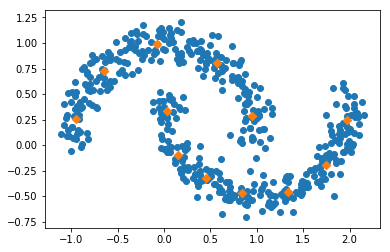

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(new_c1[:,0],new_c1[:,1],marker='D') 
plt.show()

<b>Task 2: Calculate sigma value</b> <br>
The value of sigma is chosen according to maximum distance “d” between two hidden neurons
$$\sigma=\frac{d}{\sqrt{2k}}$$
where, d=maximum distance between two hidden centers. k=number of hidden neuron.

In [16]:
#your code goes here.
def distance(c):
    dis=[]
    for i in range(len(c)):
        for j in range(i+1,len(c)):
            dis.append(np.sqrt((c[i][0]-c[j][0])**2+(c[i][1]-c[j][1])**2))
    d=max(dis)
    #print(dis)
    return d
            
d=distance(new_c1)
print(d)

2.911327688928407


In [17]:
sigma = (d / np.sqrt(2*k))
print(sigma,k)

0.5942722759925657 12


<b>Task 3: Calculate Hidden Layer Activation</b> <br>
Here we use Gaussian function, $\mu$ is a receptor or cluster center.
radial distance, $$ r=||x-\mu|| $$
$$ \sigma =variance $$ [variance=spread of radial function]


$$\phi(x,\mu)=\frac{-||x-\mu||^2}{2\sigma^2}$$

Hidden layer activation, G shape should be (NxK)

In [22]:
#your code goes here.
G=[]
for i in range(0,len(X_train)):
    h=[]
    for j in range(0,len(new_c1)):
        dis=np.sqrt((X[i][0]-new_c1[j][0])**2+(X[i][1]-new_c1[j][1])**2)
        dis=dis**2
        dis=((-1*dis)/(2*(sigma*sigma)))
        h.append(dis)
    G.append(h)
G=np.matrix(G)
print(G)

[[ -4.22748334  -2.81083431  -2.91854054 ...  -2.86055727  -0.01715071
   -0.15893358]
 [ -1.86987726  -0.79216365  -6.27704501 ...  -4.67510332  -0.51553562
   -1.30232076]
 [ -0.47520581  -0.01257433 -10.39154736 ...  -6.81160865  -2.25380041
   -3.51503444]
 ...
 [ -2.47589042  -1.22162962  -5.46993287 ...  -4.40725038  -0.29317768
   -0.96784776]
 [-12.53292106 -11.36187924  -0.09907302 ...  -1.50824171  -3.95792505
   -2.38235463]
 [ -0.21954903  -0.05095121  -9.78834379 ...  -5.76779882  -2.23941707
   -3.30084692]]


<b>Task 4: Train Weights</b> <br>
Let, rbf transformed data=G, weights=W and targets=A <br>
$$G.W=A$$ <br>
so, $$W=G^{-1}A$$ 

W shape should be (Kx1)

In [23]:
#your code goes here.
inv_G=np.linalg.pinv(G)
w=np.dot(inv_G,y_train)
print(w)

[[-0.07054367 -0.05081827 -0.09765823  0.07084041 -0.01849094 -0.04227468
   0.02022446  0.0724865   0.06148776  0.02287907  0.04366257  0.05163272]]


<b>Task 5: Classification accuracy</b> <br>
Now, classify the test data using the learned Hidden layer (centroids, sigma) and learned weights <br>
Accuracy should be greater than 95%

$G= rbf (Test_NxK) $ <br>
$A=G.W$

Use 0.5 as threshold.

In [26]:
new_c1

array([[ 1.9682629 ,  0.24225359],
       [ 1.74850756, -0.19049127],
       [-0.94301538,  0.2592151 ],
       [ 0.57516493,  0.80765225],
       [ 1.34058044, -0.45843353],
       [-0.65002496,  0.73031122],
       [ 0.84540589, -0.47242917],
       [ 0.95199627,  0.28969526],
       [ 0.03313868,  0.33845555],
       [-0.07659758,  0.99144526],
       [ 0.45152188, -0.32126385],
       [ 0.1470703 , -0.09797153]])

In [27]:
#your code goes here.
G=[]
for i in range(0,len(X_test)):
    h=[]
    for j in range(0,len(new_c1)):
        dis=np.sqrt((X[i][0]-new_c1[j][0])**2+(X[i][1]-new_c1[j][1])**2)
        dis=dis**2
        dis=((-1*dis)/(2*(sigma*sigma)))
        h.append(dis)
    G.append(h)
G=np.matrix(G)
print(G)


def sign(a):
    if a>=0.5:
        return 1
    return 0

w=w.reshape(-1,1)
predict_y=np.dot(G,w)

output_y=[]

for i in predict_y:
    output_y.append(sign(i))

print(output_y)

f=0
for i,j in zip(y_test,output_y):
    if(i==j):
        f+=1
accuracy_y=(f/len(y_test))*100
print('accuracy : ',accuracy_y,'%')

[[ -4.22748334  -2.81083431  -2.91854054 ...  -2.86055727  -0.01715071
   -0.15893358]
 [ -1.86987726  -0.79216365  -6.27704501 ...  -4.67510332  -0.51553562
   -1.30232076]
 [ -0.47520581  -0.01257433 -10.39154736 ...  -6.81160865  -2.25380041
   -3.51503444]
 ...
 [ -2.44729396  -2.54731188  -4.20954888 ...  -1.05499816  -1.53135259
   -1.33855183]
 [ -3.99575894  -3.9630986   -2.78498633 ...  -0.35939494  -1.65188214
   -1.10135079]
 [-11.72886469  -9.95815816  -0.11276516 ...  -2.40207122  -2.70772064
   -1.55522988]]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
accuracy :  48.0 %


<b>Bonus Task: Plot decision boundary</b>

In [12]:
#your code goes here.

<b>1D Interpolation</b>

In [12]:
N=100
x = np.linspace(0, 10, N)
noise = np.random.uniform(-0.1, 0.1, N)
y = np.sin(x) +noise
x=x.reshape(-1,1)
x.shape

(100, 1)

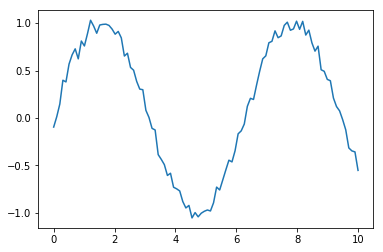

In [13]:
plt.plot(x,y)

<b>Task 6: Interpolation</b><br>
k=10 <br>

* calculate centroids, sigma (you can also use k random centroids, see what happens)
* calculate Hidden layer
* calculate weights
* predict $\hat{y}$
* plot the predicted $\hat{y}$ and actual $y$

In [ ]:
#your code goes here.

<b>Task 7: Test Interpolation </b>

Calculate output for the following, <br>
tx=np.array([4,7,10])  <br>
Output should be near [-0.74,  0.64, -0.55] <br>

In [ ]:
#your code goes here.

### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>MD ABU SHAHAN</u> bearing registration no. <u>170103020017</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>MD. ABU SHAHAN</u><br>
Date: <u>13/08/20</u>

_your__writing_